In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import joblib
import copy

import tensorflow as tf
from keras import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

optimizer = SGD(learning_rate=0.001, momentum=0.9)
# optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy',  metrics=['accuracy'])

2022-11-30 17:27:38.789018: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32, 32),
    batch_size=20000,
    class_mode='binary')


test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'data/test',
        target_size=(32, 32),
        batch_size=2500,
        class_mode='binary')

(x_train, y_train) = train_generator.next()
(x_test, y_test) = test_generator.next()

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [5]:
super_duper_loss = []
super_duper_result = []

2022-11-30 17:28:40.292879: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://61677f04-4666-4b76-8fb9-2f07332c32ba/assets
Epoch 1/50
18/18 [==============================] - 2s 103ms/step - loss: 0.9948 - accuracy: 0.5233 - val_loss: 0.6883 - val_accuracy: 0.5450
Epoch 2/50
18/18 [==============================] - 2s 90ms/step - loss: 0.9545 - accuracy: 0.5472 - val_loss: 0.6929 - val_accuracy: 0.5450
Epoch 3/50
18/18 [==============================] - 2s 90ms/step - loss: 0.8857 - accuracy: 0.5667 - val_loss: 0.6915 - val_accuracy: 0.5450
Epoch 4/50
18/18 [==============================] - 2s 91ms/step - loss: 0.8281 - accuracy: 0.5811 - val_loss: 0.6894 - val_accuracy: 0.5450
Epoch 5/50
18/18 [==============================] - 2s 89ms/step - loss: 0.8291 - accuracy: 0.5728 - val_loss: 0.6970 - val_accuracy: 0.5450
Epoch 6/50
18/18 [==============================] - 2s 92ms/step - loss: 0.8068 - accuracy: 0.5828 - val_loss: 0.7013 - val_accuracy: 0.5450
Epoch 7/50
18/18 [==============================] - 2s 89ms/step - l

Epoch 16/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5590 - accuracy: 0.7139 - val_loss: 0.5674 - val_accuracy: 0.7150
Epoch 17/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5650 - accuracy: 0.7067 - val_loss: 0.5261 - val_accuracy: 0.7400
Epoch 18/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5475 - accuracy: 0.7217 - val_loss: 0.5279 - val_accuracy: 0.7350
Epoch 19/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5500 - accuracy: 0.7161 - val_loss: 0.5383 - val_accuracy: 0.7450
Epoch 20/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5471 - accuracy: 0.7122 - val_loss: 0.5080 - val_accuracy: 0.7650
Epoch 21/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5268 - accuracy: 0.7400 - val_loss: 0.5185 - val_accuracy: 0.7800
Epoch 22/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5497 - accuracy: 0.7211 - val_loss: 0.5347 - val_accuracy: 0.7300
Epoch 

Epoch 24/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5030 - accuracy: 0.7494 - val_loss: 0.5865 - val_accuracy: 0.7150
Epoch 25/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4914 - accuracy: 0.7583 - val_loss: 0.5430 - val_accuracy: 0.7550
Epoch 26/50
18/18 [==============================] - 2s 83ms/step - loss: 0.4999 - accuracy: 0.7578 - val_loss: 0.5471 - val_accuracy: 0.7400
Epoch 27/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4827 - accuracy: 0.7622 - val_loss: 0.6123 - val_accuracy: 0.6750
Epoch 28/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4812 - accuracy: 0.7650 - val_loss: 0.5359 - val_accuracy: 0.7100
Epoch 29/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4852 - accuracy: 0.7650 - val_loss: 0.5807 - val_accuracy: 0.7250
Epoch 30/50
18/18 [==============================] - 2s 85ms/step - loss: 0.5102 - accuracy: 0.7367 - val_loss: 0.6287 - val_accuracy: 0.6950
Epoch 

Epoch 32/50
18/18 [==============================] - 2s 97ms/step - loss: 0.4748 - accuracy: 0.7772 - val_loss: 0.5806 - val_accuracy: 0.7350
Epoch 33/50
18/18 [==============================] - 2s 85ms/step - loss: 0.4626 - accuracy: 0.7850 - val_loss: 0.5422 - val_accuracy: 0.7500
Epoch 34/50
18/18 [==============================] - 2s 86ms/step - loss: 0.4817 - accuracy: 0.7611 - val_loss: 0.5499 - val_accuracy: 0.7500
Epoch 35/50
18/18 [==============================] - 2s 86ms/step - loss: 0.4800 - accuracy: 0.7750 - val_loss: 0.5477 - val_accuracy: 0.7450
Epoch 36/50
18/18 [==============================] - 2s 93ms/step - loss: 0.4767 - accuracy: 0.7733 - val_loss: 0.5900 - val_accuracy: 0.7050
Epoch 37/50
18/18 [==============================] - 2s 85ms/step - loss: 0.4751 - accuracy: 0.7778 - val_loss: 0.5711 - val_accuracy: 0.7250
Epoch 38/50
18/18 [==============================] - 2s 85ms/step - loss: 0.4696 - accuracy: 0.7822 - val_loss: 0.5416 - val_accuracy: 0.7500
Epoch 

Epoch 40/50
18/18 [==============================] - 2s 85ms/step - loss: 0.4335 - accuracy: 0.8011 - val_loss: 0.5431 - val_accuracy: 0.7200
Epoch 41/50
18/18 [==============================] - 2s 86ms/step - loss: 0.4279 - accuracy: 0.8022 - val_loss: 0.5311 - val_accuracy: 0.7300
Epoch 42/50
18/18 [==============================] - 2s 86ms/step - loss: 0.4727 - accuracy: 0.7817 - val_loss: 0.5147 - val_accuracy: 0.7500
Epoch 43/50
18/18 [==============================] - 2s 86ms/step - loss: 0.4502 - accuracy: 0.7928 - val_loss: 0.5604 - val_accuracy: 0.7400
Epoch 44/50
18/18 [==============================] - 2s 86ms/step - loss: 0.4282 - accuracy: 0.7917 - val_loss: 0.5286 - val_accuracy: 0.7450
Epoch 45/50
18/18 [==============================] - 2s 85ms/step - loss: 0.4412 - accuracy: 0.7906 - val_loss: 0.4928 - val_accuracy: 0.7650
Epoch 46/50
18/18 [==============================] - 2s 86ms/step - loss: 0.4289 - accuracy: 0.8089 - val_loss: 0.4760 - val_accuracy: 0.8000
Epoch 

Epoch 48/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4364 - accuracy: 0.7872 - val_loss: 0.5616 - val_accuracy: 0.7200
Epoch 49/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4218 - accuracy: 0.8094 - val_loss: 0.5720 - val_accuracy: 0.7400
Epoch 50/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4192 - accuracy: 0.8044 - val_loss: 0.4740 - val_accuracy: 0.7900
Epoch 1/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5322 - accuracy: 0.7394 - val_loss: 0.5591 - val_accuracy: 0.7500
Epoch 2/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5250 - accuracy: 0.7328 - val_loss: 0.7320 - val_accuracy: 0.6650
Epoch 3/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4978 - accuracy: 0.7644 - val_loss: 0.9122 - val_accuracy: 0.6050
Epoch 4/50
18/18 [==============================] - 2s 87ms/step - loss: 0.5080 - accuracy: 0.7444 - val_loss: 0.5470 - val_accuracy: 0.7450
Epoch 5/50

Epoch 6/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5070 - accuracy: 0.7494 - val_loss: 0.5946 - val_accuracy: 0.6600
Epoch 7/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4835 - accuracy: 0.7678 - val_loss: 0.5499 - val_accuracy: 0.7100
Epoch 8/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5077 - accuracy: 0.7511 - val_loss: 0.5697 - val_accuracy: 0.7050
Epoch 9/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4913 - accuracy: 0.7578 - val_loss: 0.5417 - val_accuracy: 0.7050
Epoch 10/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4802 - accuracy: 0.7667 - val_loss: 0.5889 - val_accuracy: 0.7000
Epoch 11/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4545 - accuracy: 0.7794 - val_loss: 0.5199 - val_accuracy: 0.7400
Epoch 12/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4712 - accuracy: 0.7739 - val_loss: 0.5471 - val_accuracy: 0.7100
Epoch 13/5

Epoch 14/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4631 - accuracy: 0.7717 - val_loss: 0.4279 - val_accuracy: 0.8200
Epoch 15/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4574 - accuracy: 0.7928 - val_loss: 0.4227 - val_accuracy: 0.7750
Epoch 16/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4523 - accuracy: 0.7894 - val_loss: 0.4119 - val_accuracy: 0.8100
Epoch 17/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4407 - accuracy: 0.8000 - val_loss: 0.4248 - val_accuracy: 0.7850
Epoch 18/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4519 - accuracy: 0.7867 - val_loss: 0.4240 - val_accuracy: 0.7900
Epoch 19/50
18/18 [==============================] - 2s 84ms/step - loss: 0.4481 - accuracy: 0.7844 - val_loss: 0.4085 - val_accuracy: 0.8150
Epoch 20/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4461 - accuracy: 0.7900 - val_loss: 0.5197 - val_accuracy: 0.7550
Epoch 

Epoch 28/50
18/18 [==============================] - 1s 83ms/step - loss: 0.6178 - accuracy: 0.6628 - val_loss: 0.6122 - val_accuracy: 0.6500
Epoch 29/50
18/18 [==============================] - 1s 83ms/step - loss: 0.6135 - accuracy: 0.6672 - val_loss: 0.6605 - val_accuracy: 0.5800
Epoch 30/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6128 - accuracy: 0.6633 - val_loss: 0.6142 - val_accuracy: 0.6650
Epoch 31/50
18/18 [==============================] - 2s 84ms/step - loss: 0.6128 - accuracy: 0.6617 - val_loss: 0.6196 - val_accuracy: 0.6650
Epoch 32/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6223 - accuracy: 0.6678 - val_loss: 0.6257 - val_accuracy: 0.6500
Epoch 33/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6178 - accuracy: 0.6511 - val_loss: 0.6067 - val_accuracy: 0.6700
Epoch 34/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6136 - accuracy: 0.6583 - val_loss: 0.6120 - val_accuracy: 0.6750
Epoch 

Epoch 36/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5647 - accuracy: 0.7006 - val_loss: 0.6048 - val_accuracy: 0.6600
Epoch 37/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5578 - accuracy: 0.7000 - val_loss: 0.5843 - val_accuracy: 0.6950
Epoch 38/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5710 - accuracy: 0.7028 - val_loss: 0.5813 - val_accuracy: 0.7150
Epoch 39/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5627 - accuracy: 0.7122 - val_loss: 0.5757 - val_accuracy: 0.6800
Epoch 40/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5557 - accuracy: 0.7156 - val_loss: 0.6762 - val_accuracy: 0.6550
Epoch 41/50
18/18 [==============================] - 2s 83ms/step - loss: 0.5541 - accuracy: 0.7111 - val_loss: 0.5712 - val_accuracy: 0.6900
Epoch 42/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5558 - accuracy: 0.7067 - val_loss: 0.7962 - val_accuracy: 0.5150
Epoch 

Epoch 44/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5240 - accuracy: 0.7411 - val_loss: 0.6322 - val_accuracy: 0.6700
Epoch 45/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5099 - accuracy: 0.7517 - val_loss: 0.6317 - val_accuracy: 0.6850
Epoch 46/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5289 - accuracy: 0.7400 - val_loss: 0.6407 - val_accuracy: 0.6700
Epoch 47/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5033 - accuracy: 0.7539 - val_loss: 0.9849 - val_accuracy: 0.5050
Epoch 48/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5258 - accuracy: 0.7356 - val_loss: 0.6202 - val_accuracy: 0.7050
Epoch 49/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5087 - accuracy: 0.7483 - val_loss: 0.6423 - val_accuracy: 0.6650
Epoch 50/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5025 - accuracy: 0.7461 - val_loss: 0.6185 - val_accuracy: 0.6850
Epoch 

Epoch 2/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5707 - accuracy: 0.7044 - val_loss: 0.5876 - val_accuracy: 0.7000
Epoch 3/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5623 - accuracy: 0.7072 - val_loss: 0.5517 - val_accuracy: 0.7100
Epoch 4/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5420 - accuracy: 0.7317 - val_loss: 0.5746 - val_accuracy: 0.7300
Epoch 5/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5487 - accuracy: 0.7167 - val_loss: 0.5542 - val_accuracy: 0.7200
Epoch 6/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5523 - accuracy: 0.7183 - val_loss: 0.5539 - val_accuracy: 0.7250
Epoch 7/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5527 - accuracy: 0.7139 - val_loss: 0.5893 - val_accuracy: 0.7050
Epoch 8/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5308 - accuracy: 0.7411 - val_loss: 0.6886 - val_accuracy: 0.6300
Epoch 9/50
18

Epoch 10/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5264 - accuracy: 0.7350 - val_loss: 0.5223 - val_accuracy: 0.7550
Epoch 11/50
18/18 [==============================] - 1s 76ms/step - loss: 0.5346 - accuracy: 0.7317 - val_loss: 0.4976 - val_accuracy: 0.7450
Epoch 12/50
18/18 [==============================] - 1s 76ms/step - loss: 0.5383 - accuracy: 0.7256 - val_loss: 0.4965 - val_accuracy: 0.7650
Epoch 13/50
18/18 [==============================] - 1s 76ms/step - loss: 0.5364 - accuracy: 0.7339 - val_loss: 0.7359 - val_accuracy: 0.6000
Epoch 14/50
18/18 [==============================] - 1s 76ms/step - loss: 0.5303 - accuracy: 0.7344 - val_loss: 0.5140 - val_accuracy: 0.7550
Epoch 15/50
18/18 [==============================] - 1s 76ms/step - loss: 0.5226 - accuracy: 0.7533 - val_loss: 0.5075 - val_accuracy: 0.7450
Epoch 16/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5142 - accuracy: 0.7394 - val_loss: 0.5154 - val_accuracy: 0.7300
Epoch 

Epoch 18/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4787 - accuracy: 0.7600 - val_loss: 0.5457 - val_accuracy: 0.7150
Epoch 19/50
18/18 [==============================] - 1s 76ms/step - loss: 0.4806 - accuracy: 0.7589 - val_loss: 0.5559 - val_accuracy: 0.7000
Epoch 20/50
18/18 [==============================] - 1s 76ms/step - loss: 0.4644 - accuracy: 0.7672 - val_loss: 0.5184 - val_accuracy: 0.7450
Epoch 21/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4744 - accuracy: 0.7678 - val_loss: 0.5143 - val_accuracy: 0.7600
Epoch 22/50
18/18 [==============================] - 1s 76ms/step - loss: 0.4650 - accuracy: 0.7850 - val_loss: 0.5433 - val_accuracy: 0.7200
Epoch 23/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4545 - accuracy: 0.7839 - val_loss: 0.6077 - val_accuracy: 0.6900
Epoch 24/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4695 - accuracy: 0.7767 - val_loss: 0.5303 - val_accuracy: 0.7600
Epoch 

Epoch 26/50
18/18 [==============================] - 1s 76ms/step - loss: 0.4681 - accuracy: 0.7794 - val_loss: 0.5888 - val_accuracy: 0.7100
Epoch 27/50
18/18 [==============================] - 1s 76ms/step - loss: 0.4854 - accuracy: 0.7667 - val_loss: 0.5370 - val_accuracy: 0.7350
Epoch 28/50
18/18 [==============================] - 1s 76ms/step - loss: 0.4733 - accuracy: 0.7739 - val_loss: 0.5507 - val_accuracy: 0.7100
Epoch 29/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4568 - accuracy: 0.7756 - val_loss: 0.6530 - val_accuracy: 0.6700
Epoch 30/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4562 - accuracy: 0.7883 - val_loss: 0.6321 - val_accuracy: 0.6650
Epoch 31/50
18/18 [==============================] - 1s 76ms/step - loss: 0.4805 - accuracy: 0.7772 - val_loss: 0.6536 - val_accuracy: 0.6750
Epoch 32/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4682 - accuracy: 0.7789 - val_loss: 0.6211 - val_accuracy: 0.6750
Epoch 

Epoch 34/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4684 - accuracy: 0.7761 - val_loss: 0.5878 - val_accuracy: 0.6950
Epoch 35/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4516 - accuracy: 0.7889 - val_loss: 0.5027 - val_accuracy: 0.7800
Epoch 36/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4677 - accuracy: 0.7728 - val_loss: 1.0963 - val_accuracy: 0.5550
Epoch 37/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4506 - accuracy: 0.7900 - val_loss: 0.5984 - val_accuracy: 0.6800
Epoch 38/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4703 - accuracy: 0.7717 - val_loss: 0.6043 - val_accuracy: 0.7050
Epoch 39/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4451 - accuracy: 0.7900 - val_loss: 0.4702 - val_accuracy: 0.7700
Epoch 40/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4506 - accuracy: 0.7872 - val_loss: 0.4636 - val_accuracy: 0.7700
Epoch 

Epoch 48/50
18/18 [==============================] - 1s 83ms/step - loss: 0.6749 - accuracy: 0.5811 - val_loss: 0.6966 - val_accuracy: 0.5500
Epoch 49/50
18/18 [==============================] - 1s 83ms/step - loss: 0.6763 - accuracy: 0.5683 - val_loss: 0.7008 - val_accuracy: 0.5200
Epoch 50/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6792 - accuracy: 0.5750 - val_loss: 0.6991 - val_accuracy: 0.5200
Epoch 1/50
18/18 [==============================] - 2s 86ms/step - loss: 0.7119 - accuracy: 0.5183 - val_loss: 0.6835 - val_accuracy: 0.5650
Epoch 2/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6836 - accuracy: 0.5689 - val_loss: 0.6714 - val_accuracy: 0.5750
Epoch 3/50
18/18 [==============================] - 1s 83ms/step - loss: 0.6782 - accuracy: 0.5883 - val_loss: 0.6649 - val_accuracy: 0.5950
Epoch 4/50
18/18 [==============================] - 2s 85ms/step - loss: 0.6635 - accuracy: 0.6050 - val_loss: 0.6619 - val_accuracy: 0.6000
Epoch 5/50

Epoch 6/50
18/18 [==============================] - 2s 83ms/step - loss: 0.5842 - accuracy: 0.6806 - val_loss: 0.6636 - val_accuracy: 0.6550
Epoch 7/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5860 - accuracy: 0.6850 - val_loss: 0.6502 - val_accuracy: 0.6600
Epoch 8/50
18/18 [==============================] - 1s 83ms/step - loss: 0.6021 - accuracy: 0.6872 - val_loss: 0.6635 - val_accuracy: 0.6500
Epoch 9/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5809 - accuracy: 0.6839 - val_loss: 0.6494 - val_accuracy: 0.6750
Epoch 10/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5789 - accuracy: 0.6967 - val_loss: 0.6918 - val_accuracy: 0.6150
Epoch 11/50
18/18 [==============================] - 2s 87ms/step - loss: 0.5833 - accuracy: 0.6889 - val_loss: 0.6354 - val_accuracy: 0.6550
Epoch 12/50
18/18 [==============================] - 2s 83ms/step - loss: 0.5785 - accuracy: 0.7000 - val_loss: 0.7483 - val_accuracy: 0.5500
Epoch 13/5

Epoch 14/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5692 - accuracy: 0.7106 - val_loss: 0.5986 - val_accuracy: 0.7050
Epoch 15/50
18/18 [==============================] - 2s 83ms/step - loss: 0.5532 - accuracy: 0.7156 - val_loss: 0.6129 - val_accuracy: 0.7050
Epoch 16/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5580 - accuracy: 0.7122 - val_loss: 0.6054 - val_accuracy: 0.7100
Epoch 17/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5515 - accuracy: 0.7128 - val_loss: 0.6245 - val_accuracy: 0.6650
Epoch 18/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5481 - accuracy: 0.7061 - val_loss: 0.5940 - val_accuracy: 0.7000
Epoch 19/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5451 - accuracy: 0.7222 - val_loss: 0.6084 - val_accuracy: 0.6700
Epoch 20/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5464 - accuracy: 0.7194 - val_loss: 0.6202 - val_accuracy: 0.7000
Epoch 

Epoch 22/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5186 - accuracy: 0.7394 - val_loss: 0.5852 - val_accuracy: 0.7100
Epoch 23/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5166 - accuracy: 0.7306 - val_loss: 0.5401 - val_accuracy: 0.7550
Epoch 24/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4946 - accuracy: 0.7567 - val_loss: 0.5695 - val_accuracy: 0.6850
Epoch 25/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5201 - accuracy: 0.7339 - val_loss: 0.5973 - val_accuracy: 0.6650
Epoch 26/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5044 - accuracy: 0.7494 - val_loss: 0.5360 - val_accuracy: 0.7350
Epoch 27/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5102 - accuracy: 0.7494 - val_loss: 0.5575 - val_accuracy: 0.6900
Epoch 28/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5052 - accuracy: 0.7517 - val_loss: 0.5672 - val_accuracy: 0.7150
Epoch 

Epoch 30/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5006 - accuracy: 0.7550 - val_loss: 0.4950 - val_accuracy: 0.7200
Epoch 31/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5036 - accuracy: 0.7478 - val_loss: 0.4659 - val_accuracy: 0.7900
Epoch 32/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5025 - accuracy: 0.7478 - val_loss: 0.4853 - val_accuracy: 0.7500
Epoch 33/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4900 - accuracy: 0.7778 - val_loss: 0.5206 - val_accuracy: 0.7350
Epoch 34/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5027 - accuracy: 0.7567 - val_loss: 0.4945 - val_accuracy: 0.7350
Epoch 35/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4862 - accuracy: 0.7733 - val_loss: 0.4738 - val_accuracy: 0.7600
Epoch 36/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4834 - accuracy: 0.7633 - val_loss: 0.5013 - val_accuracy: 0.7500
Epoch 

Epoch 38/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4368 - accuracy: 0.8006 - val_loss: 0.5331 - val_accuracy: 0.7350
Epoch 39/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4334 - accuracy: 0.7911 - val_loss: 0.5449 - val_accuracy: 0.7350
Epoch 40/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4345 - accuracy: 0.7911 - val_loss: 0.6558 - val_accuracy: 0.6550
Epoch 41/50
18/18 [==============================] - 2s 83ms/step - loss: 0.4350 - accuracy: 0.7956 - val_loss: 0.8086 - val_accuracy: 0.6400
Epoch 42/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4320 - accuracy: 0.7972 - val_loss: 0.8233 - val_accuracy: 0.6450
Epoch 43/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4196 - accuracy: 0.8128 - val_loss: 0.5539 - val_accuracy: 0.7450
Epoch 44/50
18/18 [==============================] - 2s 84ms/step - loss: 0.4343 - accuracy: 0.7944 - val_loss: 0.6409 - val_accuracy: 0.6900
Epoch 

Epoch 46/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4622 - accuracy: 0.7722 - val_loss: 0.5620 - val_accuracy: 0.7550
Epoch 47/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4643 - accuracy: 0.7850 - val_loss: 0.5270 - val_accuracy: 0.7650
Epoch 48/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4823 - accuracy: 0.7633 - val_loss: 0.5905 - val_accuracy: 0.7450
Epoch 49/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4669 - accuracy: 0.7778 - val_loss: 0.5460 - val_accuracy: 0.7600
Epoch 50/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4504 - accuracy: 0.7872 - val_loss: 0.5917 - val_accuracy: 0.7200
Epoch 1/50
18/18 [==============================] - 2s 84ms/step - loss: 0.5490 - accuracy: 0.7289 - val_loss: 0.5201 - val_accuracy: 0.7600
Epoch 2/50
18/18 [==============================] - 1s 83ms/step - loss: 0.5423 - accuracy: 0.7250 - val_loss: 0.5201 - val_accuracy: 0.7900
Epoch 3/

Epoch 10/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6898 - accuracy: 0.5406 - val_loss: 0.6894 - val_accuracy: 0.5150
Epoch 11/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6921 - accuracy: 0.5283 - val_loss: 0.6880 - val_accuracy: 0.5200
Epoch 12/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6933 - accuracy: 0.5300 - val_loss: 0.6913 - val_accuracy: 0.5350
Epoch 13/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6931 - accuracy: 0.5256 - val_loss: 0.6910 - val_accuracy: 0.5300
Epoch 14/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6898 - accuracy: 0.5456 - val_loss: 0.6917 - val_accuracy: 0.5400
Epoch 15/50
18/18 [==============================] - 1s 79ms/step - loss: 0.7000 - accuracy: 0.5250 - val_loss: 0.6922 - val_accuracy: 0.5200
Epoch 16/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6936 - accuracy: 0.5289 - val_loss: 0.6951 - val_accuracy: 0.4900
Epoch 

Epoch 18/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6871 - accuracy: 0.5594 - val_loss: 0.7107 - val_accuracy: 0.4500
Epoch 19/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6882 - accuracy: 0.5428 - val_loss: 0.7082 - val_accuracy: 0.4650
Epoch 20/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6848 - accuracy: 0.5561 - val_loss: 0.7095 - val_accuracy: 0.4900
Epoch 21/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6907 - accuracy: 0.5456 - val_loss: 0.7084 - val_accuracy: 0.4800
Epoch 22/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6841 - accuracy: 0.5611 - val_loss: 0.7101 - val_accuracy: 0.4850
Epoch 23/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6840 - accuracy: 0.5478 - val_loss: 0.7096 - val_accuracy: 0.4900
Epoch 24/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6921 - accuracy: 0.5372 - val_loss: 0.7113 - val_accuracy: 0.4800
Epoch 

Epoch 26/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6046 - accuracy: 0.6706 - val_loss: 0.6416 - val_accuracy: 0.6300
Epoch 27/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5925 - accuracy: 0.6939 - val_loss: 0.6544 - val_accuracy: 0.6450
Epoch 28/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5862 - accuracy: 0.6872 - val_loss: 0.6412 - val_accuracy: 0.6250
Epoch 29/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5989 - accuracy: 0.6867 - val_loss: 0.6648 - val_accuracy: 0.5800
Epoch 30/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5898 - accuracy: 0.6828 - val_loss: 0.6873 - val_accuracy: 0.6000
Epoch 31/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5789 - accuracy: 0.7011 - val_loss: 0.6689 - val_accuracy: 0.6300
Epoch 32/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5982 - accuracy: 0.6689 - val_loss: 0.6440 - val_accuracy: 0.6450
Epoch 

Epoch 34/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5648 - accuracy: 0.7128 - val_loss: 0.6145 - val_accuracy: 0.6550
Epoch 35/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5498 - accuracy: 0.7239 - val_loss: 0.6132 - val_accuracy: 0.6750
Epoch 36/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5530 - accuracy: 0.7189 - val_loss: 0.5988 - val_accuracy: 0.6800
Epoch 37/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5426 - accuracy: 0.7150 - val_loss: 0.6393 - val_accuracy: 0.6600
Epoch 38/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5436 - accuracy: 0.7189 - val_loss: 0.6299 - val_accuracy: 0.6450
Epoch 39/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5489 - accuracy: 0.7228 - val_loss: 0.6000 - val_accuracy: 0.6850
Epoch 40/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5341 - accuracy: 0.7317 - val_loss: 0.6153 - val_accuracy: 0.6450
Epoch 

Epoch 42/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4873 - accuracy: 0.7672 - val_loss: 0.5631 - val_accuracy: 0.7050
Epoch 43/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4899 - accuracy: 0.7589 - val_loss: 0.5530 - val_accuracy: 0.7350
Epoch 44/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4973 - accuracy: 0.7611 - val_loss: 0.5618 - val_accuracy: 0.7250
Epoch 45/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4823 - accuracy: 0.7678 - val_loss: 0.5641 - val_accuracy: 0.7000
Epoch 46/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4858 - accuracy: 0.7628 - val_loss: 0.5403 - val_accuracy: 0.7400
Epoch 47/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4905 - accuracy: 0.7661 - val_loss: 0.6029 - val_accuracy: 0.7050
Epoch 48/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4830 - accuracy: 0.7650 - val_loss: 0.5425 - val_accuracy: 0.7050
Epoch 

Epoch 50/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4795 - accuracy: 0.7583 - val_loss: 0.5131 - val_accuracy: 0.7600
Epoch 1/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5838 - accuracy: 0.6928 - val_loss: 0.5593 - val_accuracy: 0.7350
Epoch 2/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5447 - accuracy: 0.7183 - val_loss: 0.5442 - val_accuracy: 0.7400
Epoch 3/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5320 - accuracy: 0.7417 - val_loss: 0.5213 - val_accuracy: 0.7550
Epoch 4/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5374 - accuracy: 0.7300 - val_loss: 0.5407 - val_accuracy: 0.7250
Epoch 5/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5185 - accuracy: 0.7350 - val_loss: 0.6532 - val_accuracy: 0.6550
Epoch 6/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5143 - accuracy: 0.7461 - val_loss: 0.5596 - val_accuracy: 0.7250
Epoch 7/50
1

Epoch 8/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5316 - accuracy: 0.7394 - val_loss: 0.5389 - val_accuracy: 0.7150
Epoch 9/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5267 - accuracy: 0.7422 - val_loss: 0.5626 - val_accuracy: 0.7100
Epoch 10/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5251 - accuracy: 0.7350 - val_loss: 0.5367 - val_accuracy: 0.7400
Epoch 11/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5355 - accuracy: 0.7356 - val_loss: 0.5325 - val_accuracy: 0.7400
Epoch 12/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5251 - accuracy: 0.7411 - val_loss: 0.5526 - val_accuracy: 0.7300
Epoch 13/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5160 - accuracy: 0.7433 - val_loss: 0.5361 - val_accuracy: 0.7450
Epoch 14/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5098 - accuracy: 0.7472 - val_loss: 0.5600 - val_accuracy: 0.7100
Epoch 15

Epoch 16/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5052 - accuracy: 0.7611 - val_loss: 0.4783 - val_accuracy: 0.7550
Epoch 17/50
18/18 [==============================] - 2s 85ms/step - loss: 0.5103 - accuracy: 0.7517 - val_loss: 0.5072 - val_accuracy: 0.7450
Epoch 18/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5045 - accuracy: 0.7394 - val_loss: 0.4786 - val_accuracy: 0.7550
Epoch 19/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5000 - accuracy: 0.7594 - val_loss: 0.4645 - val_accuracy: 0.7550
Epoch 20/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5024 - accuracy: 0.7483 - val_loss: 0.4834 - val_accuracy: 0.7400
Epoch 21/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4958 - accuracy: 0.7578 - val_loss: 0.4566 - val_accuracy: 0.7900
Epoch 22/50
18/18 [==============================] - 1s 79ms/step - loss: 0.4850 - accuracy: 0.7589 - val_loss: 0.4930 - val_accuracy: 0.7400
Epoch 

Epoch 30/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6804 - accuracy: 0.5650 - val_loss: 0.7034 - val_accuracy: 0.4750
Epoch 31/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6857 - accuracy: 0.5517 - val_loss: 0.7078 - val_accuracy: 0.4950
Epoch 32/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6876 - accuracy: 0.5606 - val_loss: 0.7059 - val_accuracy: 0.4750
Epoch 33/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6837 - accuracy: 0.5594 - val_loss: 0.7054 - val_accuracy: 0.4900
Epoch 34/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6864 - accuracy: 0.5611 - val_loss: 0.7071 - val_accuracy: 0.4700
Epoch 35/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6796 - accuracy: 0.5694 - val_loss: 0.7072 - val_accuracy: 0.4650
Epoch 36/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6907 - accuracy: 0.5517 - val_loss: 0.7087 - val_accuracy: 0.4700
Epoch 

Epoch 38/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6840 - accuracy: 0.5617 - val_loss: 0.7068 - val_accuracy: 0.4650
Epoch 39/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6811 - accuracy: 0.5711 - val_loss: 0.7095 - val_accuracy: 0.4750
Epoch 40/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6839 - accuracy: 0.5606 - val_loss: 0.7115 - val_accuracy: 0.4550
Epoch 41/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6870 - accuracy: 0.5511 - val_loss: 0.7098 - val_accuracy: 0.4350
Epoch 42/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6886 - accuracy: 0.5428 - val_loss: 0.7123 - val_accuracy: 0.4450
Epoch 43/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6717 - accuracy: 0.5744 - val_loss: 0.7161 - val_accuracy: 0.4200
Epoch 44/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6825 - accuracy: 0.5567 - val_loss: 0.7173 - val_accuracy: 0.4500
Epoch 

Epoch 46/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6892 - accuracy: 0.5511 - val_loss: 0.7027 - val_accuracy: 0.5150
Epoch 47/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6741 - accuracy: 0.5928 - val_loss: 0.7037 - val_accuracy: 0.4950
Epoch 48/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6747 - accuracy: 0.5756 - val_loss: 0.7006 - val_accuracy: 0.4950
Epoch 49/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6744 - accuracy: 0.5844 - val_loss: 0.6980 - val_accuracy: 0.5150
Epoch 50/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6795 - accuracy: 0.5750 - val_loss: 0.7010 - val_accuracy: 0.4950
Epoch 1/50
18/18 [==============================] - 1s 79ms/step - loss: 0.7179 - accuracy: 0.5044 - val_loss: 0.6893 - val_accuracy: 0.5600
Epoch 2/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6997 - accuracy: 0.5422 - val_loss: 0.6855 - val_accuracy: 0.5700
Epoch 3/

Epoch 4/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6006 - accuracy: 0.6761 - val_loss: 0.5907 - val_accuracy: 0.6850
Epoch 5/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5960 - accuracy: 0.6828 - val_loss: 0.6038 - val_accuracy: 0.6850
Epoch 6/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6051 - accuracy: 0.6767 - val_loss: 0.5958 - val_accuracy: 0.6800
Epoch 7/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5986 - accuracy: 0.6711 - val_loss: 0.6085 - val_accuracy: 0.6750
Epoch 8/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5941 - accuracy: 0.6906 - val_loss: 0.5942 - val_accuracy: 0.6750
Epoch 9/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5842 - accuracy: 0.7022 - val_loss: 0.6337 - val_accuracy: 0.6500
Epoch 10/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5857 - accuracy: 0.6839 - val_loss: 0.5931 - val_accuracy: 0.6600
Epoch 11/50


Epoch 12/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5702 - accuracy: 0.7022 - val_loss: 0.5387 - val_accuracy: 0.7300
Epoch 13/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5641 - accuracy: 0.7167 - val_loss: 0.5110 - val_accuracy: 0.7750
Epoch 14/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5638 - accuracy: 0.7122 - val_loss: 0.5048 - val_accuracy: 0.7700
Epoch 15/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5437 - accuracy: 0.7233 - val_loss: 0.5096 - val_accuracy: 0.7750
Epoch 16/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5633 - accuracy: 0.7117 - val_loss: 0.5271 - val_accuracy: 0.7550
Epoch 17/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5460 - accuracy: 0.7233 - val_loss: 0.6022 - val_accuracy: 0.6550
Epoch 18/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5572 - accuracy: 0.7228 - val_loss: 0.5538 - val_accuracy: 0.7100
Epoch 

Epoch 20/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5065 - accuracy: 0.7472 - val_loss: 0.5486 - val_accuracy: 0.7100
Epoch 21/50
18/18 [==============================] - 2s 88ms/step - loss: 0.5027 - accuracy: 0.7600 - val_loss: 0.5819 - val_accuracy: 0.6950
Epoch 22/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4895 - accuracy: 0.7572 - val_loss: 0.5870 - val_accuracy: 0.6900
Epoch 23/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5058 - accuracy: 0.7406 - val_loss: 0.5887 - val_accuracy: 0.6850
Epoch 24/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4930 - accuracy: 0.7600 - val_loss: 0.5538 - val_accuracy: 0.7300
Epoch 25/50
18/18 [==============================] - 1s 77ms/step - loss: 0.5085 - accuracy: 0.7400 - val_loss: 0.5404 - val_accuracy: 0.7650
Epoch 26/50
18/18 [==============================] - 1s 79ms/step - loss: 0.4936 - accuracy: 0.7578 - val_loss: 0.5438 - val_accuracy: 0.7400
Epoch 

Epoch 28/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5114 - accuracy: 0.7522 - val_loss: 0.5405 - val_accuracy: 0.7300
Epoch 29/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5077 - accuracy: 0.7572 - val_loss: 0.6083 - val_accuracy: 0.6900
Epoch 30/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5065 - accuracy: 0.7483 - val_loss: 0.5458 - val_accuracy: 0.7400
Epoch 31/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4972 - accuracy: 0.7567 - val_loss: 0.5587 - val_accuracy: 0.6850
Epoch 32/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4962 - accuracy: 0.7583 - val_loss: 0.5311 - val_accuracy: 0.7450
Epoch 33/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5026 - accuracy: 0.7528 - val_loss: 0.5564 - val_accuracy: 0.6950
Epoch 34/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4869 - accuracy: 0.7639 - val_loss: 0.5944 - val_accuracy: 0.6700
Epoch 

Epoch 36/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4753 - accuracy: 0.7689 - val_loss: 0.4913 - val_accuracy: 0.7650
Epoch 37/50
18/18 [==============================] - 1s 77ms/step - loss: 0.4685 - accuracy: 0.7767 - val_loss: 0.6322 - val_accuracy: 0.6600
Epoch 38/50
18/18 [==============================] - 1s 81ms/step - loss: 0.4631 - accuracy: 0.7772 - val_loss: 0.6457 - val_accuracy: 0.6750
Epoch 39/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4651 - accuracy: 0.7839 - val_loss: 0.6037 - val_accuracy: 0.7250
Epoch 40/50
18/18 [==============================] - 1s 79ms/step - loss: 0.4737 - accuracy: 0.7711 - val_loss: 0.6309 - val_accuracy: 0.6950
Epoch 41/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4538 - accuracy: 0.7744 - val_loss: 0.4680 - val_accuracy: 0.7850
Epoch 42/50
18/18 [==============================] - 1s 78ms/step - loss: 0.4503 - accuracy: 0.7761 - val_loss: 0.4802 - val_accuracy: 0.7600
Epoch 

Epoch 50/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6785 - accuracy: 0.5572 - val_loss: 0.7056 - val_accuracy: 0.4700
Epoch 1/50
18/18 [==============================] - 1s 81ms/step - loss: 0.7147 - accuracy: 0.5050 - val_loss: 0.6864 - val_accuracy: 0.5350
Epoch 2/50
18/18 [==============================] - 1s 80ms/step - loss: 0.7058 - accuracy: 0.5133 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/50
18/18 [==============================] - 1s 80ms/step - loss: 0.7025 - accuracy: 0.5211 - val_loss: 0.6981 - val_accuracy: 0.4600
Epoch 4/50
18/18 [==============================] - 1s 80ms/step - loss: 0.7024 - accuracy: 0.5150 - val_loss: 0.7013 - val_accuracy: 0.4450
Epoch 5/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6906 - accuracy: 0.5333 - val_loss: 0.7003 - val_accuracy: 0.4700
Epoch 6/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6856 - accuracy: 0.5667 - val_loss: 0.7062 - val_accuracy: 0.4900
Epoch 7/50
1

Epoch 8/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6972 - accuracy: 0.5228 - val_loss: 0.6918 - val_accuracy: 0.5650
Epoch 9/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6992 - accuracy: 0.5017 - val_loss: 0.6926 - val_accuracy: 0.5600
Epoch 10/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6892 - accuracy: 0.5400 - val_loss: 0.6952 - val_accuracy: 0.5650
Epoch 11/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6893 - accuracy: 0.5444 - val_loss: 0.6963 - val_accuracy: 0.5500
Epoch 12/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6948 - accuracy: 0.5228 - val_loss: 0.6945 - val_accuracy: 0.5550
Epoch 13/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6924 - accuracy: 0.5361 - val_loss: 0.6936 - val_accuracy: 0.5350
Epoch 14/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6913 - accuracy: 0.5167 - val_loss: 0.6935 - val_accuracy: 0.5300
Epoch 15

Epoch 16/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6874 - accuracy: 0.5472 - val_loss: 0.7018 - val_accuracy: 0.4800
Epoch 17/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6870 - accuracy: 0.5561 - val_loss: 0.7043 - val_accuracy: 0.5000
Epoch 18/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6890 - accuracy: 0.5456 - val_loss: 0.7017 - val_accuracy: 0.4750
Epoch 19/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6901 - accuracy: 0.5494 - val_loss: 0.7006 - val_accuracy: 0.5250
Epoch 20/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6904 - accuracy: 0.5400 - val_loss: 0.7019 - val_accuracy: 0.4750
Epoch 21/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6892 - accuracy: 0.5444 - val_loss: 0.7001 - val_accuracy: 0.4850
Epoch 22/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6895 - accuracy: 0.5489 - val_loss: 0.7040 - val_accuracy: 0.4950
Epoch 

Epoch 24/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5933 - accuracy: 0.6739 - val_loss: 0.6152 - val_accuracy: 0.6400
Epoch 25/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5888 - accuracy: 0.6911 - val_loss: 0.6136 - val_accuracy: 0.6250
Epoch 26/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5864 - accuracy: 0.6789 - val_loss: 0.6133 - val_accuracy: 0.6500
Epoch 27/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5978 - accuracy: 0.6817 - val_loss: 0.5996 - val_accuracy: 0.6850
Epoch 28/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5882 - accuracy: 0.6806 - val_loss: 0.6011 - val_accuracy: 0.6550
Epoch 29/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5800 - accuracy: 0.6844 - val_loss: 0.5804 - val_accuracy: 0.6850
Epoch 30/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5910 - accuracy: 0.6717 - val_loss: 0.5853 - val_accuracy: 0.6900
Epoch 

Epoch 32/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5403 - accuracy: 0.7356 - val_loss: 0.5292 - val_accuracy: 0.7250
Epoch 33/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5332 - accuracy: 0.7200 - val_loss: 0.5349 - val_accuracy: 0.7500
Epoch 34/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5485 - accuracy: 0.7239 - val_loss: 0.5869 - val_accuracy: 0.6650
Epoch 35/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5343 - accuracy: 0.7244 - val_loss: 0.5482 - val_accuracy: 0.7250
Epoch 36/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5477 - accuracy: 0.7239 - val_loss: 0.5191 - val_accuracy: 0.7350
Epoch 37/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5464 - accuracy: 0.7094 - val_loss: 0.5592 - val_accuracy: 0.7200
Epoch 38/50
18/18 [==============================] - 1s 81ms/step - loss: 0.5286 - accuracy: 0.7467 - val_loss: 0.5345 - val_accuracy: 0.7100
Epoch 

Epoch 40/50
18/18 [==============================] - 1s 80ms/step - loss: 0.4792 - accuracy: 0.7639 - val_loss: 0.5372 - val_accuracy: 0.7450
Epoch 41/50
18/18 [==============================] - 1s 80ms/step - loss: 0.4633 - accuracy: 0.7706 - val_loss: 0.5480 - val_accuracy: 0.7350
Epoch 42/50
18/18 [==============================] - 1s 83ms/step - loss: 0.4791 - accuracy: 0.7650 - val_loss: 0.5440 - val_accuracy: 0.7500
Epoch 43/50
18/18 [==============================] - 1s 82ms/step - loss: 0.4732 - accuracy: 0.7717 - val_loss: 0.5788 - val_accuracy: 0.6850
Epoch 44/50
18/18 [==============================] - 1s 81ms/step - loss: 0.4784 - accuracy: 0.7667 - val_loss: 0.5443 - val_accuracy: 0.7450
Epoch 45/50
18/18 [==============================] - 1s 80ms/step - loss: 0.4642 - accuracy: 0.7711 - val_loss: 0.6565 - val_accuracy: 0.6550
Epoch 46/50
18/18 [==============================] - 1s 79ms/step - loss: 0.4659 - accuracy: 0.7728 - val_loss: 0.5608 - val_accuracy: 0.7200
Epoch 

Epoch 48/50
18/18 [==============================] - 1s 79ms/step - loss: 0.4611 - accuracy: 0.7756 - val_loss: 0.7184 - val_accuracy: 0.6250
Epoch 49/50
18/18 [==============================] - 1s 80ms/step - loss: 0.4614 - accuracy: 0.7817 - val_loss: 0.5547 - val_accuracy: 0.7350
Epoch 50/50
18/18 [==============================] - 1s 81ms/step - loss: 0.4632 - accuracy: 0.7750 - val_loss: 0.6639 - val_accuracy: 0.7000
Epoch 1/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6216 - accuracy: 0.6900 - val_loss: 0.5322 - val_accuracy: 0.7250
Epoch 2/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5909 - accuracy: 0.7050 - val_loss: 0.5796 - val_accuracy: 0.6900
Epoch 3/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5606 - accuracy: 0.7211 - val_loss: 0.5420 - val_accuracy: 0.7150
Epoch 4/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5506 - accuracy: 0.7089 - val_loss: 0.5082 - val_accuracy: 0.7450
Epoch 5/50

Epoch 12/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6912 - accuracy: 0.5489 - val_loss: 0.6978 - val_accuracy: 0.4850
Epoch 13/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6895 - accuracy: 0.5433 - val_loss: 0.6988 - val_accuracy: 0.4900
Epoch 14/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6910 - accuracy: 0.5456 - val_loss: 0.7008 - val_accuracy: 0.4800
Epoch 15/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6884 - accuracy: 0.5467 - val_loss: 0.7036 - val_accuracy: 0.4900
Epoch 16/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6890 - accuracy: 0.5411 - val_loss: 0.7062 - val_accuracy: 0.5100
Epoch 17/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6866 - accuracy: 0.5528 - val_loss: 0.7018 - val_accuracy: 0.5150
Epoch 18/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6883 - accuracy: 0.5450 - val_loss: 0.7002 - val_accuracy: 0.5150
Epoch 

Epoch 20/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6841 - accuracy: 0.5517 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 21/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6912 - accuracy: 0.5350 - val_loss: 0.6878 - val_accuracy: 0.5150
Epoch 22/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6846 - accuracy: 0.5578 - val_loss: 0.6818 - val_accuracy: 0.5650
Epoch 23/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6864 - accuracy: 0.5467 - val_loss: 0.6839 - val_accuracy: 0.5600
Epoch 24/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6805 - accuracy: 0.5633 - val_loss: 0.6938 - val_accuracy: 0.5100
Epoch 25/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6857 - accuracy: 0.5572 - val_loss: 0.6894 - val_accuracy: 0.5200
Epoch 26/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6883 - accuracy: 0.5606 - val_loss: 0.6874 - val_accuracy: 0.5050
Epoch 

Epoch 28/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6877 - accuracy: 0.5406 - val_loss: 0.6923 - val_accuracy: 0.4950
Epoch 29/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6855 - accuracy: 0.5478 - val_loss: 0.6929 - val_accuracy: 0.5150
Epoch 30/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6785 - accuracy: 0.5728 - val_loss: 0.6913 - val_accuracy: 0.5300
Epoch 31/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6827 - accuracy: 0.5572 - val_loss: 0.6901 - val_accuracy: 0.5250
Epoch 32/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6830 - accuracy: 0.5644 - val_loss: 0.6887 - val_accuracy: 0.5200
Epoch 33/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6826 - accuracy: 0.5589 - val_loss: 0.6844 - val_accuracy: 0.5450
Epoch 34/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6754 - accuracy: 0.5772 - val_loss: 0.6884 - val_accuracy: 0.5150
Epoch 

Epoch 36/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6858 - accuracy: 0.5594 - val_loss: 0.7056 - val_accuracy: 0.4650
Epoch 37/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6835 - accuracy: 0.5583 - val_loss: 0.7064 - val_accuracy: 0.4550
Epoch 38/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6854 - accuracy: 0.5500 - val_loss: 0.7076 - val_accuracy: 0.4600
Epoch 39/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6855 - accuracy: 0.5517 - val_loss: 0.7109 - val_accuracy: 0.4400
Epoch 40/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6902 - accuracy: 0.5461 - val_loss: 0.7105 - val_accuracy: 0.4350
Epoch 41/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6871 - accuracy: 0.5472 - val_loss: 0.7133 - val_accuracy: 0.4500
Epoch 42/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6817 - accuracy: 0.5628 - val_loss: 0.7127 - val_accuracy: 0.4500
Epoch 

Epoch 44/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6826 - accuracy: 0.5572 - val_loss: 0.6989 - val_accuracy: 0.5150
Epoch 45/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6822 - accuracy: 0.5689 - val_loss: 0.7049 - val_accuracy: 0.4850
Epoch 46/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6800 - accuracy: 0.5767 - val_loss: 0.7058 - val_accuracy: 0.5150
Epoch 47/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6733 - accuracy: 0.5900 - val_loss: 0.7088 - val_accuracy: 0.4850
Epoch 48/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6730 - accuracy: 0.5817 - val_loss: 0.7071 - val_accuracy: 0.4800
Epoch 49/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6775 - accuracy: 0.5744 - val_loss: 0.7049 - val_accuracy: 0.5100
Epoch 50/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6727 - accuracy: 0.5667 - val_loss: 0.7057 - val_accuracy: 0.4950
Epoch 

Epoch 2/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6008 - accuracy: 0.6739 - val_loss: 0.5830 - val_accuracy: 0.7250
Epoch 3/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5994 - accuracy: 0.6750 - val_loss: 0.6164 - val_accuracy: 0.6700
Epoch 4/50
18/18 [==============================] - 1s 81ms/step - loss: 0.5823 - accuracy: 0.6911 - val_loss: 0.5788 - val_accuracy: 0.7250
Epoch 5/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5827 - accuracy: 0.7000 - val_loss: 0.5699 - val_accuracy: 0.7200
Epoch 6/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5795 - accuracy: 0.7033 - val_loss: 0.5786 - val_accuracy: 0.7000
Epoch 7/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5751 - accuracy: 0.6978 - val_loss: 0.6042 - val_accuracy: 0.6700
Epoch 8/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5722 - accuracy: 0.6911 - val_loss: 0.5739 - val_accuracy: 0.7250
Epoch 9/50
18

Epoch 10/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5512 - accuracy: 0.7200 - val_loss: 0.5562 - val_accuracy: 0.7350
Epoch 11/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5612 - accuracy: 0.7183 - val_loss: 0.5580 - val_accuracy: 0.7550
Epoch 12/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5543 - accuracy: 0.7111 - val_loss: 0.5621 - val_accuracy: 0.7550
Epoch 13/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5646 - accuracy: 0.7150 - val_loss: 0.6165 - val_accuracy: 0.6600
Epoch 14/50
18/18 [==============================] - 1s 78ms/step - loss: 0.5585 - accuracy: 0.7206 - val_loss: 0.5825 - val_accuracy: 0.6750
Epoch 15/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5358 - accuracy: 0.7361 - val_loss: 0.5724 - val_accuracy: 0.7050
Epoch 16/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5514 - accuracy: 0.7139 - val_loss: 0.5710 - val_accuracy: 0.7000
Epoch 

Epoch 18/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5217 - accuracy: 0.7417 - val_loss: 0.4812 - val_accuracy: 0.7700
Epoch 19/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5251 - accuracy: 0.7294 - val_loss: 0.4971 - val_accuracy: 0.7600
Epoch 20/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5277 - accuracy: 0.7256 - val_loss: 0.4974 - val_accuracy: 0.7350
Epoch 21/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5123 - accuracy: 0.7467 - val_loss: 0.4904 - val_accuracy: 0.7350
Epoch 22/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5176 - accuracy: 0.7406 - val_loss: 0.5470 - val_accuracy: 0.7050
Epoch 23/50
18/18 [==============================] - 1s 79ms/step - loss: 0.5062 - accuracy: 0.7411 - val_loss: 0.5039 - val_accuracy: 0.7400
Epoch 24/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5090 - accuracy: 0.7533 - val_loss: 0.5584 - val_accuracy: 0.7100
Epoch 

Epoch 32/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6840 - accuracy: 0.5672 - val_loss: 0.7079 - val_accuracy: 0.4350
Epoch 33/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6835 - accuracy: 0.5478 - val_loss: 0.7046 - val_accuracy: 0.4500
Epoch 34/50
18/18 [==============================] - 1s 83ms/step - loss: 0.6861 - accuracy: 0.5567 - val_loss: 0.7062 - val_accuracy: 0.4950
Epoch 35/50
18/18 [==============================] - 2s 85ms/step - loss: 0.6890 - accuracy: 0.5583 - val_loss: 0.7059 - val_accuracy: 0.5050
Epoch 36/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6890 - accuracy: 0.5417 - val_loss: 0.7088 - val_accuracy: 0.4400
Epoch 37/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6898 - accuracy: 0.5422 - val_loss: 0.7130 - val_accuracy: 0.4250
Epoch 38/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6856 - accuracy: 0.5583 - val_loss: 0.7132 - val_accuracy: 0.4600
Epoch 

Epoch 40/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6861 - accuracy: 0.5494 - val_loss: 0.6841 - val_accuracy: 0.5400
Epoch 41/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6804 - accuracy: 0.5728 - val_loss: 0.6840 - val_accuracy: 0.5650
Epoch 42/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6822 - accuracy: 0.5550 - val_loss: 0.6859 - val_accuracy: 0.5400
Epoch 43/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6787 - accuracy: 0.5550 - val_loss: 0.6856 - val_accuracy: 0.5450
Epoch 44/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6920 - accuracy: 0.5433 - val_loss: 0.6874 - val_accuracy: 0.5300
Epoch 45/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6843 - accuracy: 0.5533 - val_loss: 0.6842 - val_accuracy: 0.5650
Epoch 46/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6797 - accuracy: 0.5633 - val_loss: 0.6886 - val_accuracy: 0.5250
Epoch 

Epoch 48/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6759 - accuracy: 0.5683 - val_loss: 0.7147 - val_accuracy: 0.4600
Epoch 49/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6738 - accuracy: 0.5778 - val_loss: 0.7110 - val_accuracy: 0.4800
Epoch 50/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6738 - accuracy: 0.5850 - val_loss: 0.7145 - val_accuracy: 0.4900
Epoch 1/50
18/18 [==============================] - 1s 82ms/step - loss: 0.7167 - accuracy: 0.5050 - val_loss: 0.7005 - val_accuracy: 0.5050
Epoch 2/50
18/18 [==============================] - 1s 80ms/step - loss: 0.7190 - accuracy: 0.5050 - val_loss: 0.6958 - val_accuracy: 0.4750
Epoch 3/50
18/18 [==============================] - 1s 79ms/step - loss: 0.7083 - accuracy: 0.5056 - val_loss: 0.6900 - val_accuracy: 0.5350
Epoch 4/50
18/18 [==============================] - 1s 80ms/step - loss: 0.7064 - accuracy: 0.5111 - val_loss: 0.6872 - val_accuracy: 0.5450
Epoch 5/50

Epoch 6/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6954 - accuracy: 0.5389 - val_loss: 0.7070 - val_accuracy: 0.4850
Epoch 7/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6850 - accuracy: 0.5522 - val_loss: 0.7100 - val_accuracy: 0.4850
Epoch 8/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6924 - accuracy: 0.5333 - val_loss: 0.7084 - val_accuracy: 0.4850
Epoch 9/50
18/18 [==============================] - 1s 82ms/step - loss: 0.6902 - accuracy: 0.5356 - val_loss: 0.7108 - val_accuracy: 0.4750
Epoch 10/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6943 - accuracy: 0.5250 - val_loss: 0.7137 - val_accuracy: 0.4450
Epoch 11/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6922 - accuracy: 0.5450 - val_loss: 0.7093 - val_accuracy: 0.4350
Epoch 12/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6913 - accuracy: 0.5367 - val_loss: 0.7087 - val_accuracy: 0.4400
Epoch 13/5

Epoch 14/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6884 - accuracy: 0.5317 - val_loss: 0.7119 - val_accuracy: 0.4700
Epoch 15/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6839 - accuracy: 0.5511 - val_loss: 0.7158 - val_accuracy: 0.4450
Epoch 16/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6871 - accuracy: 0.5544 - val_loss: 0.7194 - val_accuracy: 0.4500
Epoch 17/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6885 - accuracy: 0.5372 - val_loss: 0.7203 - val_accuracy: 0.4450
Epoch 18/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6867 - accuracy: 0.5517 - val_loss: 0.7117 - val_accuracy: 0.5150
Epoch 19/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6847 - accuracy: 0.5567 - val_loss: 0.7212 - val_accuracy: 0.4650
Epoch 20/50
18/18 [==============================] - 1s 81ms/step - loss: 0.6881 - accuracy: 0.5417 - val_loss: 0.7169 - val_accuracy: 0.4950
Epoch 

Epoch 22/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5950 - accuracy: 0.6800 - val_loss: 0.6114 - val_accuracy: 0.6200
Epoch 23/50
18/18 [==============================] - 1s 80ms/step - loss: 0.6037 - accuracy: 0.6656 - val_loss: 0.6071 - val_accuracy: 0.6500
Epoch 24/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5900 - accuracy: 0.6883 - val_loss: 0.6035 - val_accuracy: 0.6550
Epoch 25/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5945 - accuracy: 0.6789 - val_loss: 0.6101 - val_accuracy: 0.6550
Epoch 26/50
18/18 [==============================] - 1s 81ms/step - loss: 0.5879 - accuracy: 0.6928 - val_loss: 0.6003 - val_accuracy: 0.6500
Epoch 27/50
18/18 [==============================] - 2s 87ms/step - loss: 0.5819 - accuracy: 0.6883 - val_loss: 0.6307 - val_accuracy: 0.6700
Epoch 28/50
18/18 [==============================] - 1s 81ms/step - loss: 0.5848 - accuracy: 0.6917 - val_loss: 0.5993 - val_accuracy: 0.6700
Epoch 

Epoch 30/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5585 - accuracy: 0.7144 - val_loss: 0.5772 - val_accuracy: 0.6900
Epoch 31/50
18/18 [==============================] - 1s 81ms/step - loss: 0.5596 - accuracy: 0.7128 - val_loss: 0.6165 - val_accuracy: 0.6500
Epoch 32/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5505 - accuracy: 0.7206 - val_loss: 0.6305 - val_accuracy: 0.6100
Epoch 33/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5500 - accuracy: 0.7200 - val_loss: 0.6146 - val_accuracy: 0.6600
Epoch 34/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5478 - accuracy: 0.7150 - val_loss: 0.6092 - val_accuracy: 0.6700
Epoch 35/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5397 - accuracy: 0.7333 - val_loss: 0.6068 - val_accuracy: 0.6650
Epoch 36/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5575 - accuracy: 0.7311 - val_loss: 0.6068 - val_accuracy: 0.6600
Epoch 

Epoch 38/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5240 - accuracy: 0.7483 - val_loss: 0.5157 - val_accuracy: 0.7300
Epoch 39/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5135 - accuracy: 0.7433 - val_loss: 0.6752 - val_accuracy: 0.6500
Epoch 40/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5113 - accuracy: 0.7522 - val_loss: 0.5437 - val_accuracy: 0.6900
Epoch 41/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5092 - accuracy: 0.7617 - val_loss: 0.5187 - val_accuracy: 0.7100
Epoch 42/50
18/18 [==============================] - 1s 80ms/step - loss: 0.5202 - accuracy: 0.7439 - val_loss: 0.5724 - val_accuracy: 0.7000
Epoch 43/50
18/18 [==============================] - 1s 80ms/step - loss: 0.4990 - accuracy: 0.7600 - val_loss: 0.5099 - val_accuracy: 0.7250
Epoch 44/50
18/18 [==============================] - 1s 82ms/step - loss: 0.5247 - accuracy: 0.7433 - val_loss: 0.5116 - val_accuracy: 0.7550
Epoch 

Epoch 2/50
18/18 [==============================] - 1s 75ms/step - loss: 0.7091 - accuracy: 0.5067 - val_loss: 0.6980 - val_accuracy: 0.5150
Epoch 3/50
18/18 [==============================] - 1s 76ms/step - loss: 0.7134 - accuracy: 0.4994 - val_loss: 0.6967 - val_accuracy: 0.4800
Epoch 4/50
18/18 [==============================] - 1s 75ms/step - loss: 0.7066 - accuracy: 0.5094 - val_loss: 0.6964 - val_accuracy: 0.5200
Epoch 5/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6992 - accuracy: 0.5239 - val_loss: 0.6985 - val_accuracy: 0.5300
Epoch 6/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6969 - accuracy: 0.5156 - val_loss: 0.6995 - val_accuracy: 0.5100
Epoch 7/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6956 - accuracy: 0.5211 - val_loss: 0.6997 - val_accuracy: 0.4650
Epoch 8/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6914 - accuracy: 0.5367 - val_loss: 0.7010 - val_accuracy: 0.5100
Epoch 9/50
18

Epoch 10/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6895 - accuracy: 0.5306 - val_loss: 0.6935 - val_accuracy: 0.4900
Epoch 11/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6904 - accuracy: 0.5317 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 12/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6837 - accuracy: 0.5461 - val_loss: 0.6973 - val_accuracy: 0.5000
Epoch 13/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6866 - accuracy: 0.5628 - val_loss: 0.6972 - val_accuracy: 0.5100
Epoch 14/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6873 - accuracy: 0.5406 - val_loss: 0.6944 - val_accuracy: 0.5150
Epoch 15/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6899 - accuracy: 0.5389 - val_loss: 0.6978 - val_accuracy: 0.5050
Epoch 16/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6841 - accuracy: 0.5617 - val_loss: 0.6939 - val_accuracy: 0.5600
Epoch 

Epoch 18/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6880 - accuracy: 0.5450 - val_loss: 0.6934 - val_accuracy: 0.5100
Epoch 19/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6866 - accuracy: 0.5628 - val_loss: 0.6950 - val_accuracy: 0.5150
Epoch 20/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6798 - accuracy: 0.5589 - val_loss: 0.6912 - val_accuracy: 0.5600
Epoch 21/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6929 - accuracy: 0.5439 - val_loss: 0.6874 - val_accuracy: 0.5450
Epoch 22/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6841 - accuracy: 0.5594 - val_loss: 0.6855 - val_accuracy: 0.5900
Epoch 23/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6884 - accuracy: 0.5567 - val_loss: 0.6849 - val_accuracy: 0.5850
Epoch 24/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6852 - accuracy: 0.5628 - val_loss: 0.6843 - val_accuracy: 0.5700
Epoch 

Epoch 26/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6827 - accuracy: 0.5733 - val_loss: 0.6912 - val_accuracy: 0.5750
Epoch 27/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6787 - accuracy: 0.5711 - val_loss: 0.6961 - val_accuracy: 0.5450
Epoch 28/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6843 - accuracy: 0.5394 - val_loss: 0.6999 - val_accuracy: 0.5050
Epoch 29/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6795 - accuracy: 0.5628 - val_loss: 0.6978 - val_accuracy: 0.5450
Epoch 30/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6867 - accuracy: 0.5711 - val_loss: 0.6934 - val_accuracy: 0.5300
Epoch 31/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6790 - accuracy: 0.5628 - val_loss: 0.6936 - val_accuracy: 0.5300
Epoch 32/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6816 - accuracy: 0.5717 - val_loss: 0.6946 - val_accuracy: 0.5250
Epoch 

Epoch 34/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6790 - accuracy: 0.5694 - val_loss: 0.6812 - val_accuracy: 0.5950
Epoch 35/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6827 - accuracy: 0.5594 - val_loss: 0.6808 - val_accuracy: 0.5900
Epoch 36/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6801 - accuracy: 0.5756 - val_loss: 0.6827 - val_accuracy: 0.6000
Epoch 37/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6774 - accuracy: 0.5728 - val_loss: 0.6820 - val_accuracy: 0.5750
Epoch 38/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6830 - accuracy: 0.5578 - val_loss: 0.6842 - val_accuracy: 0.5800
Epoch 39/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6865 - accuracy: 0.5622 - val_loss: 0.6869 - val_accuracy: 0.5400
Epoch 40/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6660 - accuracy: 0.5983 - val_loss: 0.6868 - val_accuracy: 0.5700
Epoch 

Epoch 42/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6742 - accuracy: 0.5867 - val_loss: 0.7036 - val_accuracy: 0.5250
Epoch 43/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6737 - accuracy: 0.5778 - val_loss: 0.7019 - val_accuracy: 0.5150
Epoch 44/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6753 - accuracy: 0.5828 - val_loss: 0.7008 - val_accuracy: 0.5300
Epoch 45/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6828 - accuracy: 0.5817 - val_loss: 0.6997 - val_accuracy: 0.5350
Epoch 46/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6822 - accuracy: 0.5661 - val_loss: 0.6985 - val_accuracy: 0.5250
Epoch 47/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6774 - accuracy: 0.5678 - val_loss: 0.7001 - val_accuracy: 0.5000
Epoch 48/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6724 - accuracy: 0.5850 - val_loss: 0.6993 - val_accuracy: 0.5050
Epoch 

Epoch 50/50
18/18 [==============================] - 1s 75ms/step - loss: 0.5618 - accuracy: 0.7078 - val_loss: 0.6262 - val_accuracy: 0.6250
Epoch 1/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6428 - accuracy: 0.6511 - val_loss: 0.5938 - val_accuracy: 0.6300
Epoch 2/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6302 - accuracy: 0.6556 - val_loss: 0.5630 - val_accuracy: 0.7050
Epoch 3/50
18/18 [==============================] - 1s 75ms/step - loss: 0.6295 - accuracy: 0.6450 - val_loss: 0.5938 - val_accuracy: 0.6400
Epoch 4/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6092 - accuracy: 0.6694 - val_loss: 0.5652 - val_accuracy: 0.7150
Epoch 5/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6074 - accuracy: 0.6778 - val_loss: 0.5614 - val_accuracy: 0.6950
Epoch 6/50
18/18 [==============================] - 1s 74ms/step - loss: 0.6175 - accuracy: 0.6672 - val_loss: 0.5491 - val_accuracy: 0.7350
Epoch 7/50
1

Epoch 14/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6869 - accuracy: 0.5511 - val_loss: 0.7159 - val_accuracy: 0.4250
Epoch 15/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6864 - accuracy: 0.5517 - val_loss: 0.7152 - val_accuracy: 0.4450
Epoch 16/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6868 - accuracy: 0.5494 - val_loss: 0.7186 - val_accuracy: 0.4650
Epoch 17/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6956 - accuracy: 0.5311 - val_loss: 0.7132 - val_accuracy: 0.4300
Epoch 18/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6948 - accuracy: 0.5306 - val_loss: 0.7100 - val_accuracy: 0.4050
Epoch 19/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6903 - accuracy: 0.5406 - val_loss: 0.7101 - val_accuracy: 0.4200
Epoch 20/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6851 - accuracy: 0.5517 - val_loss: 0.7071 - val_accuracy: 0.4350
Epoch 

Epoch 22/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6878 - accuracy: 0.5500 - val_loss: 0.7001 - val_accuracy: 0.4900
Epoch 23/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6867 - accuracy: 0.5494 - val_loss: 0.7016 - val_accuracy: 0.4650
Epoch 24/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6843 - accuracy: 0.5528 - val_loss: 0.7037 - val_accuracy: 0.4450
Epoch 25/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6943 - accuracy: 0.5389 - val_loss: 0.7036 - val_accuracy: 0.4500
Epoch 26/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6870 - accuracy: 0.5383 - val_loss: 0.7090 - val_accuracy: 0.4750
Epoch 27/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6877 - accuracy: 0.5356 - val_loss: 0.7073 - val_accuracy: 0.4550
Epoch 28/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6903 - accuracy: 0.5344 - val_loss: 0.7042 - val_accuracy: 0.4600
Epoch 

Epoch 30/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6893 - accuracy: 0.5444 - val_loss: 0.7081 - val_accuracy: 0.5000
Epoch 31/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6767 - accuracy: 0.5939 - val_loss: 0.7082 - val_accuracy: 0.5000
Epoch 32/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6827 - accuracy: 0.5544 - val_loss: 0.7099 - val_accuracy: 0.4800
Epoch 33/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6825 - accuracy: 0.5583 - val_loss: 0.7111 - val_accuracy: 0.5000
Epoch 34/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6853 - accuracy: 0.5622 - val_loss: 0.7101 - val_accuracy: 0.4850
Epoch 35/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6778 - accuracy: 0.5617 - val_loss: 0.7058 - val_accuracy: 0.4950
Epoch 36/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6784 - accuracy: 0.5606 - val_loss: 0.7081 - val_accuracy: 0.4800
Epoch 

Epoch 38/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6803 - accuracy: 0.5772 - val_loss: 0.6969 - val_accuracy: 0.5150
Epoch 39/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6837 - accuracy: 0.5556 - val_loss: 0.6937 - val_accuracy: 0.5250
Epoch 40/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6773 - accuracy: 0.5789 - val_loss: 0.6893 - val_accuracy: 0.5300
Epoch 41/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6781 - accuracy: 0.5772 - val_loss: 0.6911 - val_accuracy: 0.5100
Epoch 42/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6858 - accuracy: 0.5611 - val_loss: 0.6915 - val_accuracy: 0.5450
Epoch 43/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6786 - accuracy: 0.5733 - val_loss: 0.6970 - val_accuracy: 0.4700
Epoch 44/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6803 - accuracy: 0.5622 - val_loss: 0.6970 - val_accuracy: 0.4800
Epoch 

Epoch 46/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6759 - accuracy: 0.5778 - val_loss: 0.7100 - val_accuracy: 0.4750
Epoch 47/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6795 - accuracy: 0.5678 - val_loss: 0.7096 - val_accuracy: 0.4950
Epoch 48/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6734 - accuracy: 0.5733 - val_loss: 0.7113 - val_accuracy: 0.4800
Epoch 49/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6741 - accuracy: 0.5767 - val_loss: 0.7091 - val_accuracy: 0.4850
Epoch 50/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6710 - accuracy: 0.5856 - val_loss: 0.7098 - val_accuracy: 0.4850
Epoch 1/50
18/18 [==============================] - 1s 78ms/step - loss: 0.7190 - accuracy: 0.5044 - val_loss: 0.7004 - val_accuracy: 0.5150
Epoch 2/50
18/18 [==============================] - 1s 77ms/step - loss: 0.7207 - accuracy: 0.4911 - val_loss: 0.6985 - val_accuracy: 0.5000
Epoch 3/

Epoch 4/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6977 - accuracy: 0.5250 - val_loss: 0.6841 - val_accuracy: 0.5100
Epoch 5/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6890 - accuracy: 0.5461 - val_loss: 0.6855 - val_accuracy: 0.5400
Epoch 6/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6898 - accuracy: 0.5378 - val_loss: 0.6842 - val_accuracy: 0.5550
Epoch 7/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6922 - accuracy: 0.5511 - val_loss: 0.6872 - val_accuracy: 0.5350
Epoch 8/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6869 - accuracy: 0.5522 - val_loss: 0.6916 - val_accuracy: 0.5250
Epoch 9/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6872 - accuracy: 0.5372 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 10/50
18/18 [==============================] - 2s 86ms/step - loss: 0.6902 - accuracy: 0.5428 - val_loss: 0.6974 - val_accuracy: 0.4900
Epoch 11/50


Epoch 12/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6841 - accuracy: 0.5606 - val_loss: 0.6933 - val_accuracy: 0.4900
Epoch 13/50
18/18 [==============================] - 2s 87ms/step - loss: 0.6803 - accuracy: 0.5722 - val_loss: 0.6918 - val_accuracy: 0.5350
Epoch 14/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6915 - accuracy: 0.5389 - val_loss: 0.6913 - val_accuracy: 0.5450
Epoch 15/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6857 - accuracy: 0.5461 - val_loss: 0.6900 - val_accuracy: 0.5300
Epoch 16/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6867 - accuracy: 0.5511 - val_loss: 0.6936 - val_accuracy: 0.5450
Epoch 17/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6838 - accuracy: 0.5567 - val_loss: 0.6962 - val_accuracy: 0.5350
Epoch 18/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6877 - accuracy: 0.5500 - val_loss: 0.6983 - val_accuracy: 0.5100
Epoch 

Epoch 20/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6341 - accuracy: 0.6306 - val_loss: 0.6375 - val_accuracy: 0.6250
Epoch 21/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6411 - accuracy: 0.6378 - val_loss: 0.6238 - val_accuracy: 0.6450
Epoch 22/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6373 - accuracy: 0.6272 - val_loss: 0.6196 - val_accuracy: 0.6250
Epoch 23/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6283 - accuracy: 0.6467 - val_loss: 0.6195 - val_accuracy: 0.6400
Epoch 24/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6259 - accuracy: 0.6544 - val_loss: 0.6290 - val_accuracy: 0.6250
Epoch 25/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6227 - accuracy: 0.6539 - val_loss: 0.6784 - val_accuracy: 0.5850
Epoch 26/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6203 - accuracy: 0.6572 - val_loss: 0.6892 - val_accuracy: 0.5650
Epoch 

Epoch 34/50
18/18 [==============================] - 1s 79ms/step - loss: 0.6789 - accuracy: 0.5678 - val_loss: 0.7051 - val_accuracy: 0.5100
Epoch 35/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6825 - accuracy: 0.5544 - val_loss: 0.7020 - val_accuracy: 0.5000
Epoch 36/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6818 - accuracy: 0.5683 - val_loss: 0.7039 - val_accuracy: 0.4950
Epoch 37/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6819 - accuracy: 0.5617 - val_loss: 0.7035 - val_accuracy: 0.4950
Epoch 38/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6850 - accuracy: 0.5572 - val_loss: 0.7013 - val_accuracy: 0.5100
Epoch 39/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6775 - accuracy: 0.5744 - val_loss: 0.7018 - val_accuracy: 0.5100
Epoch 40/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6775 - accuracy: 0.5789 - val_loss: 0.7085 - val_accuracy: 0.5250
Epoch 

Epoch 42/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6773 - accuracy: 0.5644 - val_loss: 0.6822 - val_accuracy: 0.5550
Epoch 43/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6820 - accuracy: 0.5500 - val_loss: 0.6827 - val_accuracy: 0.5500
Epoch 44/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6792 - accuracy: 0.5694 - val_loss: 0.6790 - val_accuracy: 0.5900
Epoch 45/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6838 - accuracy: 0.5683 - val_loss: 0.6852 - val_accuracy: 0.5800
Epoch 46/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6829 - accuracy: 0.5600 - val_loss: 0.6849 - val_accuracy: 0.5650
Epoch 47/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6725 - accuracy: 0.5806 - val_loss: 0.6954 - val_accuracy: 0.5100
Epoch 48/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6821 - accuracy: 0.5572 - val_loss: 0.6955 - val_accuracy: 0.5250
Epoch 

Epoch 50/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6769 - accuracy: 0.5706 - val_loss: 0.7019 - val_accuracy: 0.4900
Epoch 1/50
18/18 [==============================] - 1s 78ms/step - loss: 0.7090 - accuracy: 0.5128 - val_loss: 0.6889 - val_accuracy: 0.5500
Epoch 2/50
18/18 [==============================] - 1s 77ms/step - loss: 0.7079 - accuracy: 0.5222 - val_loss: 0.6898 - val_accuracy: 0.5150
Epoch 3/50
18/18 [==============================] - 1s 78ms/step - loss: 0.7044 - accuracy: 0.5072 - val_loss: 0.6901 - val_accuracy: 0.5200
Epoch 4/50
18/18 [==============================] - 1s 78ms/step - loss: 0.7038 - accuracy: 0.5217 - val_loss: 0.6891 - val_accuracy: 0.5200
Epoch 5/50
18/18 [==============================] - 1s 78ms/step - loss: 0.7016 - accuracy: 0.5094 - val_loss: 0.6890 - val_accuracy: 0.5150
Epoch 6/50
18/18 [==============================] - 1s 77ms/step - loss: 0.7008 - accuracy: 0.5106 - val_loss: 0.6888 - val_accuracy: 0.4950
Epoch 7/50
1

Epoch 8/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6962 - accuracy: 0.5183 - val_loss: 0.7021 - val_accuracy: 0.5150
Epoch 9/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6880 - accuracy: 0.5406 - val_loss: 0.7023 - val_accuracy: 0.4900
Epoch 10/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6912 - accuracy: 0.5389 - val_loss: 0.6967 - val_accuracy: 0.5250
Epoch 11/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6863 - accuracy: 0.5489 - val_loss: 0.6958 - val_accuracy: 0.4900
Epoch 12/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6883 - accuracy: 0.5633 - val_loss: 0.6959 - val_accuracy: 0.4950
Epoch 13/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6867 - accuracy: 0.5478 - val_loss: 0.6950 - val_accuracy: 0.5250
Epoch 14/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6901 - accuracy: 0.5256 - val_loss: 0.6954 - val_accuracy: 0.4900
Epoch 15

Epoch 16/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6858 - accuracy: 0.5478 - val_loss: 0.7167 - val_accuracy: 0.4700
Epoch 17/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6791 - accuracy: 0.5739 - val_loss: 0.7153 - val_accuracy: 0.4800
Epoch 18/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6819 - accuracy: 0.5500 - val_loss: 0.7235 - val_accuracy: 0.4600
Epoch 19/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6829 - accuracy: 0.5544 - val_loss: 0.7229 - val_accuracy: 0.4600
Epoch 20/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6815 - accuracy: 0.5622 - val_loss: 0.7194 - val_accuracy: 0.4850
Epoch 21/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6866 - accuracy: 0.5522 - val_loss: 0.7184 - val_accuracy: 0.4650
Epoch 22/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6846 - accuracy: 0.5544 - val_loss: 0.7146 - val_accuracy: 0.4750
Epoch 

Epoch 24/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6900 - accuracy: 0.5461 - val_loss: 0.7041 - val_accuracy: 0.5250
Epoch 25/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6833 - accuracy: 0.5500 - val_loss: 0.7032 - val_accuracy: 0.5250
Epoch 26/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6866 - accuracy: 0.5506 - val_loss: 0.7036 - val_accuracy: 0.5300
Epoch 27/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6824 - accuracy: 0.5522 - val_loss: 0.7005 - val_accuracy: 0.5250
Epoch 28/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6839 - accuracy: 0.5556 - val_loss: 0.7022 - val_accuracy: 0.5200
Epoch 29/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6820 - accuracy: 0.5661 - val_loss: 0.7008 - val_accuracy: 0.5050
Epoch 30/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6823 - accuracy: 0.5456 - val_loss: 0.6990 - val_accuracy: 0.5300
Epoch 

Epoch 32/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6805 - accuracy: 0.5539 - val_loss: 0.6764 - val_accuracy: 0.5400
Epoch 33/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6825 - accuracy: 0.5550 - val_loss: 0.6781 - val_accuracy: 0.5500
Epoch 34/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6908 - accuracy: 0.5567 - val_loss: 0.6799 - val_accuracy: 0.5800
Epoch 35/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6797 - accuracy: 0.5628 - val_loss: 0.6815 - val_accuracy: 0.5250
Epoch 36/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6837 - accuracy: 0.5550 - val_loss: 0.6802 - val_accuracy: 0.5400
Epoch 37/50
18/18 [==============================] - 1s 76ms/step - loss: 0.6833 - accuracy: 0.5567 - val_loss: 0.6794 - val_accuracy: 0.5750
Epoch 38/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6814 - accuracy: 0.5644 - val_loss: 0.6848 - val_accuracy: 0.5600
Epoch 

Epoch 40/50
18/18 [==============================] - 1s 78ms/step - loss: 0.6806 - accuracy: 0.5517 - val_loss: 0.7135 - val_accuracy: 0.4750
Epoch 41/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6810 - accuracy: 0.5717 - val_loss: 0.7041 - val_accuracy: 0.5250
Epoch 42/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6795 - accuracy: 0.5611 - val_loss: 0.6955 - val_accuracy: 0.5600
Epoch 43/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6871 - accuracy: 0.5344 - val_loss: 0.6981 - val_accuracy: 0.5250
Epoch 44/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6782 - accuracy: 0.5672 - val_loss: 0.6962 - val_accuracy: 0.5200
Epoch 45/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6863 - accuracy: 0.5517 - val_loss: 0.6989 - val_accuracy: 0.5250
Epoch 46/50
18/18 [==============================] - 1s 77ms/step - loss: 0.6814 - accuracy: 0.5606 - val_loss: 0.6885 - val_accuracy: 0.5500
Epoch 

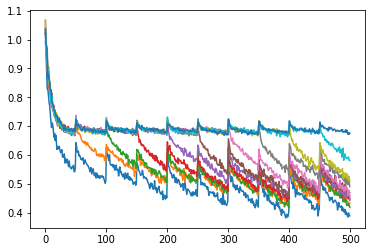

In [6]:
for ony in range(11):

    x10 = copy.deepcopy(x_train.reshape(10, 2000, 32, 32, 3))
    y10 = copy.deepcopy(y_train.reshape(10, 2000))

    num_malisious = ony
    for i in range(num_malisious):
        random.shuffle(y10[i])
        
    model_2 = copy.deepcopy(model)
    weights = model_2.get_weights()
    loss=[]
    for i in range(10):
        model_2.set_weights(weights)
        history=model_2.fit(x10[i], y10[i], epochs=50, batch_size=100, verbose=1, validation_split=0.1)
        weights = model_2.get_weights()
        loss=loss+history.history['loss']
        
    plt.plot(loss)
    plot_name = f"Malicious_amount {ony} plot.png"
    plt.savefig(plot_name)
    super_duper_loss.append(loss)
    result = model_2.evaluate(x_test, y_test)
    result = result[1]*100
    super_duper_result.append(result)

In [7]:
joblib.dump(super_duper_loss, "super_duper_loss.riya")
joblib.dump(super_duper_result, "super_duper_result.riya")

['super_duper_result.riya']

In [10]:
super_duper_loss = np.array(super_duper_loss)

In [11]:
super_duper_loss.shape

(11, 500)

In [9]:
super_duper_result

[74.91999864578247,
 74.83999729156494,
 75.95999836921692,
 72.680002450943,
 73.64000082015991,
 73.87999892234802,
 72.4399983882904,
 71.7199981212616,
 68.15999746322632,
 54.32000160217285,
 48.44000041484833]

In [2]:
super_duper_loss = joblib.load("super_duper_loss.riya")
super_duper_result = joblib.load("super_duper_result.riya")

<Figure size 640x480 with 0 Axes>

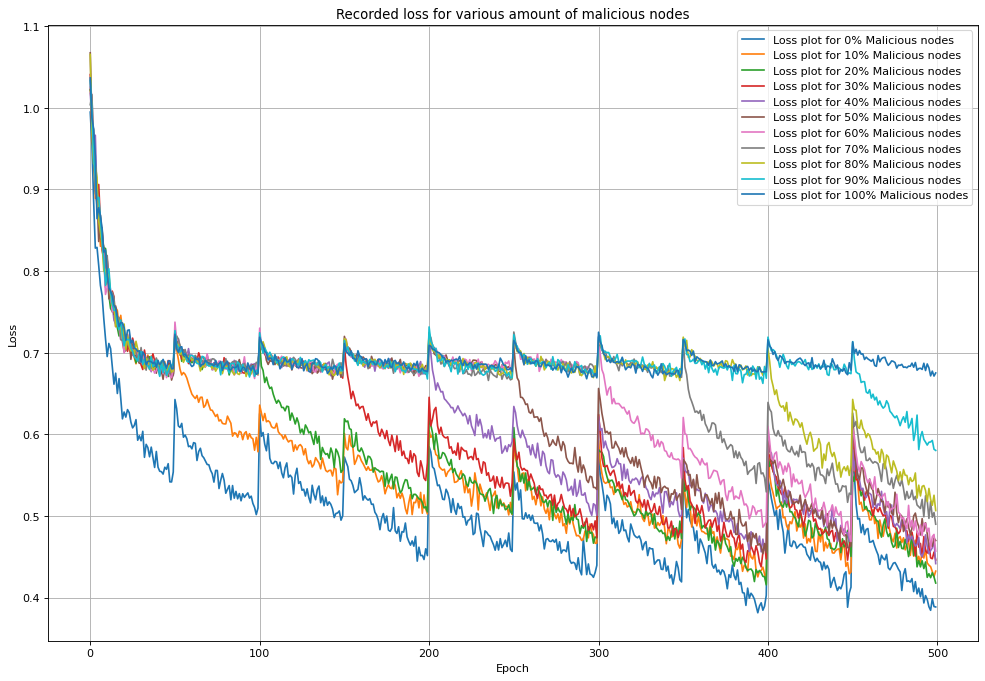

In [21]:
from matplotlib.pyplot import figure
plt.clf()
figure(figsize=(15, 10), dpi=80)


for i in range(len(super_duper_loss)):
    plt.plot(super_duper_loss[i], label=f'Loss plot for {i*10}% Malicious nodes')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Recorded loss for various amount of malicious nodes')
plt.grid()
plt.show()



<Figure size 640x480 with 0 Axes>

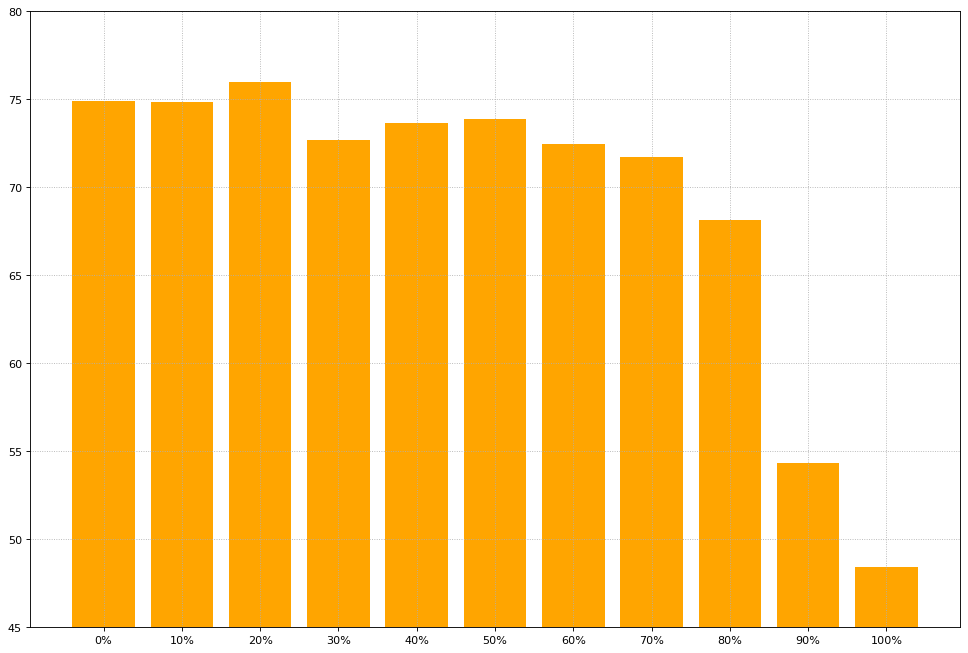

In [49]:
from matplotlib.pyplot import figure
import math
plt.clf()
figure(figsize=(15, 10), dpi=80)


plt.ylim([45, 80])
c = ['orange', 'orange']
plt.bar([0,1,2,3,4,5,6,7,8,9,10], super_duper_result, color=c )
plt.grid(linestyle=':')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10], ["0%", "10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])
plt.show()

In [40]:
super_duper_result

[74.91999864578247,
 74.83999729156494,
 75.95999836921692,
 72.680002450943,
 73.64000082015991,
 73.87999892234802,
 72.4399983882904,
 71.7199981212616,
 68.15999746322632,
 54.32000160217285,
 48.44000041484833]